# Khám phá và Làm sạch Dữ liệu Bất động sản

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

# Thiết lập style cho plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# 1. TẢI VÀ XEM DỮ LIỆU BAN ĐẦU

In [2]:
# Đọc dữ liệu
df = pd.read_csv('../data/vietnam_housing_dataset.csv')

print("="*80)
print("THÔNG TIN CƠ BẢN VỀ DỮ LIỆU")
print("="*80)
print(f"\nKích thước dataset: {df.shape[0]} dòng, {df.shape[1]} cột")
print(f"\nDung lượng bộ nhớ: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n" + "="*80)
print("5 DÒNG ĐẦU TIÊN")
print("="*80)
print(df.head())

print("\n" + "="*80)
print("THÔNG TIN CÁC CỘT")
print("="*80)
print(df.info())

print("\n" + "="*80)
print("THỐNG KÊ MÔ TẢ")
print("="*80)
print(df.describe(include='all'))

THÔNG TIN CƠ BẢN VỀ DỮ LIỆU

Kích thước dataset: 30229 dòng, 12 cột

Dung lượng bộ nhớ: 12.09 MB

5 DÒNG ĐẦU TIÊN
                                             Address  Area  Frontage  \
0  Dự án The Empire - Vinhomes Ocean Park 2, Xã L...  84.0       NaN   
1  Dự án The Crown - Vinhomes Ocean Park 3, Xã Ng...  60.0       NaN   
2  Dự án The Crown - Vinhomes Ocean Park 3, Xã Ng...  90.0       6.0   
3  Đường Nguyễn Văn Khối, Phường 11, Gò Vấp, Hồ C...  54.0       NaN   
4   Đường Quang Trung, Phường 8, Gò Vấp, Hồ Chí Minh  92.0       NaN   

   Access Road House direction Balcony direction  Floors  Bedrooms  Bathrooms  \
0          NaN             NaN               NaN     4.0       NaN        NaN   
1          NaN             NaN               NaN     5.0       NaN        NaN   
2         13.0      Đông - Bắc        Đông - Bắc     5.0       NaN        NaN   
3          3.5       Tây - Nam         Tây - Nam     2.0       2.0        3.0   
4          NaN      Đông - Nam        Đông - Nam

# 2. PHÂN TÍCH GIÁ TRỊ THIẾU (MISSING VALUES)


PHÂN TÍCH GIÁ TRỊ THIẾU

Các cột có giá trị thiếu:
                   Số lượng thiếu  Tỷ lệ (%)
Balcony direction           24983  82.645804
House direction             21239  70.260346
Furniture state             14119  46.706805
Access Road                 13297  43.987562
Frontage                    11564  38.254656
Bathrooms                    7074  23.401370
Bedrooms                     5162  17.076317
Legal status                 4506  14.906216
Floors                       3603  11.919018


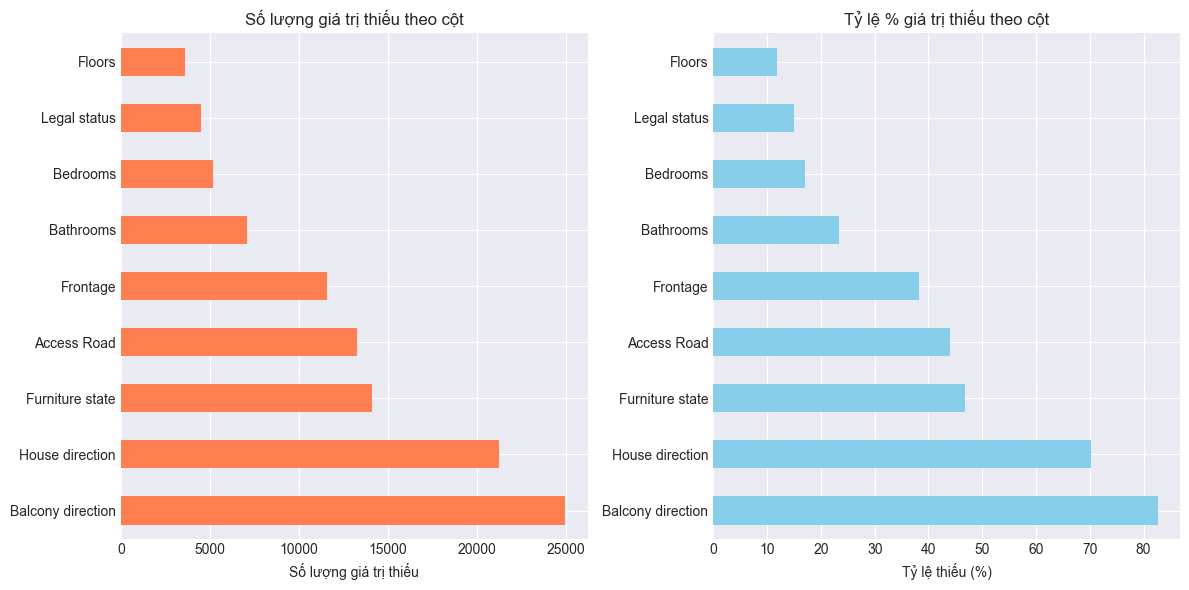

In [3]:
print("\n" + "="*80)
print("PHÂN TÍCH GIÁ TRỊ THIẾU")
print("="*80)

missing_data = pd.DataFrame({
    'Số lượng thiếu': df.isnull().sum(),
    'Tỷ lệ (%)': (df.isnull().sum() / len(df)) * 100
})
missing_data = missing_data[missing_data['Số lượng thiếu'] > 0].sort_values(
    by='Số lượng thiếu', ascending=False
)

print("\nCác cột có giá trị thiếu:")
print(missing_data)

# Visualization của missing values
if len(missing_data) > 0:
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    missing_data['Số lượng thiếu'].plot(kind='barh', color='coral')
    plt.xlabel('Số lượng giá trị thiếu')
    plt.title('Số lượng giá trị thiếu theo cột')
    plt.tight_layout()
    
    plt.subplot(1, 2, 2)
    missing_data['Tỷ lệ (%)'].plot(kind='barh', color='skyblue')
    plt.xlabel('Tỷ lệ thiếu (%)')
    plt.title('Tỷ lệ % giá trị thiếu theo cột')
    plt.tight_layout()
    
    plt.savefig('missing_values_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

# 3. PHÂN TÍCH CÁC CỘT QUAN TRỌNG

In [4]:
print("\n" + "="*80)
print("PHÂN TÍCH CHI TIẾT CÁC CỘT")
print("="*80)

# Phân tích cột Address
print("\n--- ADDRESS ---")
print(f"Số địa chỉ unique: {df['Address'].nunique()}")
print(f"Số địa chỉ trùng lặp: {df['Address'].duplicated().sum()}")
print("\nTop 5 địa chỉ xuất hiện nhiều nhất:")
print(df['Address'].value_counts().head())

# Phân tích Price
print("\n--- PRICE (Giá - tỷ VND) ---")
print(df['Price'].describe())
print(f"\nSố giá trị thiếu: {df['Price'].isnull().sum()}")
print(f"Giá trung bình: {df['Price'].mean():.2f} tỷ VND")
print(f"Giá trung vị: {df['Price'].median():.2f} tỷ VND")

# Phân tích Area
print("\n--- AREA (Diện tích - m²) ---")
print(df['Area'].describe())
print(f"Số giá trị thiếu: {df['Area'].isnull().sum()}")

# Phân tích các đặc điểm vật lý
print("\n--- ĐẶC ĐIỂM VẬT LÝ ---")
for col in ['Frontage', 'Access Road', 'Floors', 'Bedrooms', 'Bathrooms']:
    print(f"\n{col}:")
    print(f"  - Số giá trị thiếu: {df[col].isnull().sum()} ({df[col].isnull().sum()/len(df)*100:.1f}%)")
    if df[col].notna().sum() > 0:
        print(f"  - Min: {df[col].min()}, Max: {df[col].max()}, Mean: {df[col].mean():.2f}")

# Phân tích các cột categorical
print("\n--- CÁC ĐẶC ĐIỂM PHÂN LOẠI ---")
for col in ['House direction', 'Balcony direction', 'Legal status', 'Furniture state']:
    print(f"\n{col}:")
    print(f"  - Số giá trị thiếu: {df[col].isnull().sum()}")
    if df[col].notna().sum() > 0:
        print(f"  - Số loại unique: {df[col].nunique()}")
        print("  - Phân bố:")
        print(df[col].value_counts().head())


PHÂN TÍCH CHI TIẾT CÁC CỘT

--- ADDRESS ---
Số địa chỉ unique: 10265
Số địa chỉ trùng lặp: 19964

Top 5 địa chỉ xuất hiện nhiều nhất:
Address
Dự án The Empire - Vinhomes Ocean Park 2, Xã Long Hưng, Văn Giang, Hưng Yên    187
Dự án The Crown - Vinhomes Ocean Park 3, Xã Nghĩa Trụ, Văn Giang, Hưng Yên     129
Đường Trương Định, Phường Trương Định, Hai Bà Trưng, Hà Nội                     84
Đường Ngọc Thụy, Phường Ngọc Thụy, Long Biên, Hà Nội                            77
Đường Minh Khai, Phường Minh Khai, Hai Bà Trưng, Hà Nội                         74
Name: count, dtype: int64

--- PRICE (Giá - tỷ VND) ---
count    30229.000000
mean         5.872078
std          2.211877
min          1.000000
25%          4.200000
50%          5.900000
75%          7.500000
max         11.500000
Name: Price, dtype: float64

Số giá trị thiếu: 0
Giá trung bình: 5.87 tỷ VND
Giá trung vị: 5.90 tỷ VND

--- AREA (Diện tích - m²) ---
count    30229.000000
mean        68.498741
std         48.069835
min       

# 4. PHÁT HIỆN OUTLIERS

In [5]:
print("\n" + "="*80)
print("PHÁT HIỆN OUTLIERS")
print("="*80)

numeric_cols = ['Area', 'Frontage', 'Access Road', 'Floors', 'Bedrooms', 'Bathrooms', 'Price']
numeric_cols = [col for col in numeric_cols if col in df.columns]

outliers_summary = []

for col in numeric_cols:
    if df[col].notna().sum() > 0:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        outliers_summary.append({
            'Cột': col,
            'Số outliers': len(outliers),
            'Tỷ lệ (%)': len(outliers) / df[col].notna().sum() * 100,
            'Lower bound': lower_bound,
            'Upper bound': upper_bound
        })

outliers_df = pd.DataFrame(outliers_summary)
print(outliers_df)


PHÁT HIỆN OUTLIERS
           Cột  Số outliers  Tỷ lệ (%)  Lower bound  Upper bound
0         Area         1636   5.412022       -20.00       140.00
1     Frontage         2305  12.349317         2.50         6.50
2  Access Road         1110   6.555634        -5.00        19.00
3       Floors            5   0.018779        -1.00         7.00
4     Bedrooms         2532  10.100930         1.50         5.50
5    Bathrooms          287   1.239473        -1.00         7.00
6        Price            0   0.000000        -0.75        12.45


# 5. Phân tích Tỉnh Thành Phố

In [6]:
print("="*80)
print("PHÂN TÍCH THÀNH PHỐ/TỈNH TỪ CỘT ADDRESS")
print("="*80)

# ---  Tách tỉnh/thành phố ---
def extract_city(address):
    try:
        parts = str(address).split(',')
        return parts[-1].strip()  
    except:
        return None

df['City'] = df['Address'].apply(extract_city)

# ---Thống kê số lượng ---
city_counts = df['City'].value_counts(dropna=False).reset_index()
city_counts.columns = ['City', 'Count']

# ---  Tính tỷ lệ phần trăm ---
city_counts['Percentage'] = (city_counts['Count'] / len(df) * 100).round(2)

# ---  In kết quả ---
print(f"Tổng số tỉnh/thành phố khác nhau: {df['City'].nunique()}\n")
print(city_counts.head(10))


PHÂN TÍCH THÀNH PHỐ/TỈNH TỪ CỘT ADDRESS
Tổng số tỉnh/thành phố khác nhau: 107

          City  Count  Percentage
0  Hồ Chí Minh  11628       38.47
1       Hà Nội   9996       33.07
2   Bình Dương   1655        5.47
3      Đà Nẵng   1411        4.67
4     Đồng Nai    806        2.67
5    Hải Phòng    786        2.60
6    Khánh Hòa    730        2.41
7      Hà Nội.    461        1.53
8     Hưng Yên    403        1.33
9      Long An    328        1.09


# 6. Trực quan hóa dữ liệu


TẠO BIỂU ĐỒ PHÂN TÍCH


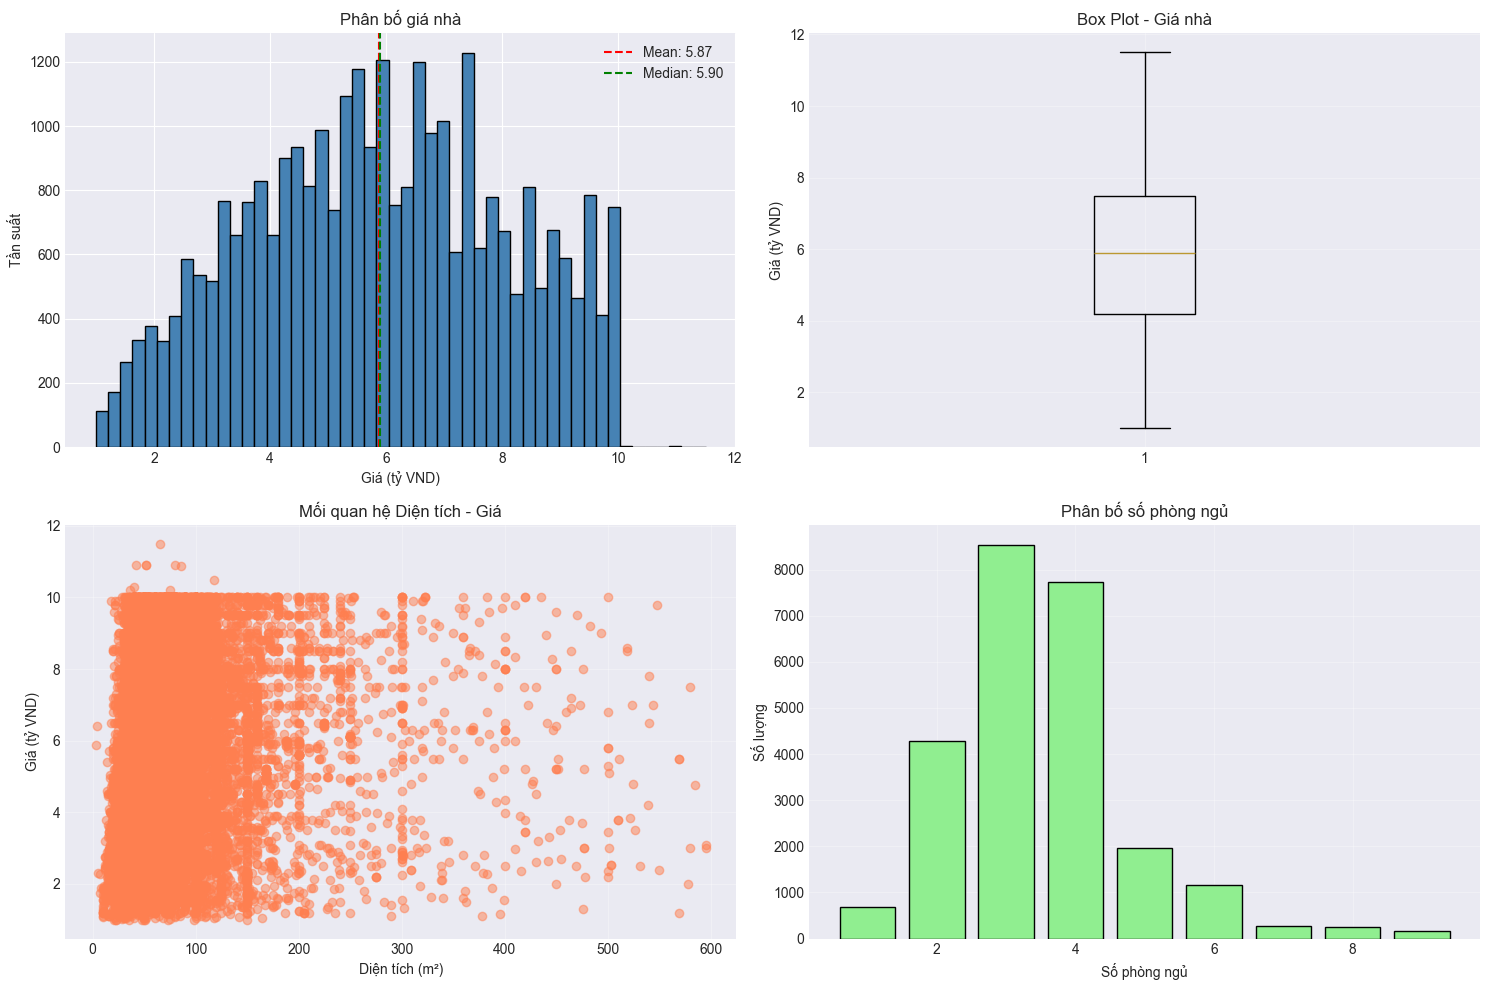

In [7]:
print("\n" + "="*80)
print("TẠO BIỂU ĐỒ PHÂN TÍCH")
print("="*80)

# Distribution của Price
if df['Price'].notna().sum() > 0:
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Histogram
    axes[0, 0].hist(df['Price'].dropna(), bins=50, color='steelblue', edgecolor='black')
    axes[0, 0].set_xlabel('Giá (tỷ VND)')
    axes[0, 0].set_ylabel('Tần suất')
    axes[0, 0].set_title('Phân bố giá nhà')
    axes[0, 0].axvline(df['Price'].mean(), color='red', linestyle='--', label=f'Mean: {df["Price"].mean():.2f}')
    axes[0, 0].axvline(df['Price'].median(), color='green', linestyle='--', label=f'Median: {df["Price"].median():.2f}')
    axes[0, 0].legend()
    
    # Box plot
    axes[0, 1].boxplot(df['Price'].dropna(), vert=True)
    axes[0, 1].set_ylabel('Giá (tỷ VND)')
    axes[0, 1].set_title('Box Plot - Giá nhà')
    axes[0, 1].grid(True, alpha=0.3)
    
    # Area vs Price scatter
    if df['Area'].notna().sum() > 0:
        valid_data = df[['Area', 'Price']].dropna()
        axes[1, 0].scatter(valid_data['Area'], valid_data['Price'], alpha=0.5, color='coral')
        axes[1, 0].set_xlabel('Diện tích (m²)')
        axes[1, 0].set_ylabel('Giá (tỷ VND)')
        axes[1, 0].set_title('Mối quan hệ Diện tích - Giá')
        axes[1, 0].grid(True, alpha=0.3)
    
    # Bedrooms distribution
    if df['Bedrooms'].notna().sum() > 0:
        bedroom_counts = df['Bedrooms'].value_counts().sort_index()
        axes[1, 1].bar(bedroom_counts.index, bedroom_counts.values, color='lightgreen', edgecolor='black')
        axes[1, 1].set_xlabel('Số phòng ngủ')
        axes[1, 1].set_ylabel('Số lượng')
        axes[1, 1].set_title('Phân bố số phòng ngủ')
        axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('price_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

# 7. LÀM SẠCH DỮ LIỆU CƠ BẢN

In [8]:
print("\n" + "="*80)
print("LỌC DỮ LIỆU CHỈ GIỮ LẠI HÀ NỘI VÀ HỒ CHÍ MINH")
print("="*80)

# Trích xuất thành phố từ cột Address
def extract_city(address):
    """Trích xuất tên thành phố từ địa chỉ"""
    if pd.isna(address):
        return None
    address = str(address).strip()
    
    # Chuẩn hóa các biến thể của Hà Nội và Hồ Chí Minh
    if 'Hà Nội' in address or 'Hanoi' in address or 'Ha Noi' in address:
        return 'Hà Nội'
    elif 'Hồ Chí Minh' in address or 'Ho Chi Minh' in address or 'Sai Gon' in address or 'Sài Gòn' in address:
        return 'Hồ Chí Minh'
    else:
        return 'Khác'

# Tạo cột City để phân loại
df['City'] = df['Address'].apply(extract_city)

# Hiển thị thống kê trước khi lọc
print(f"\nThống kê trước khi lọc:")
print(df['City'].value_counts())
print(f"\nTổng số dòng: {len(df)}")

# Lọc chỉ giữ lại Hà Nội và Hồ Chí Minh
df = df[df['City'].isin(['Hà Nội', 'Hồ Chí Minh'])].copy()

# Hiển thị kết quả sau khi lọc
print(f"\nThống kê sau khi lọc:")
print(df['City'].value_counts())
print(f"\nTổng số dòng còn lại: {len(df)}")

# Phân bố theo từng thành phố
print("\nPhân bố dữ liệu theo thành phố:")
for city in ['Hà Nội', 'Hồ Chí Minh']:
    count = (df['City'] == city).sum()
    percentage = count / len(df) * 100
    print(f"  {city}: {count:,} ({percentage:.2f}%)")

print("\n" + "="*80)
print("LÀM SẠCH DỮ LIỆU")
print("="*80)

df_cleaned = df.copy()

# Loại bỏ các dòng trùng lặp hoàn toàn
duplicates = df_cleaned.duplicated().sum()
if duplicates > 0:
    print(f"\nĐã tìm thấy {duplicates} dòng trùng lặp hoàn toàn")
    df_cleaned = df_cleaned.drop_duplicates()
    print(f"Đã loại bỏ. Số dòng còn lại: {len(df_cleaned)}")

# Xử lý outliers cực đoan cho Price (sử dụng z-score)
if df_cleaned['Price'].notna().sum() > 0:
    z_scores = np.abs(stats.zscore(df_cleaned['Price'].dropna()))
    extreme_outliers = (z_scores > 4).sum()
    if extreme_outliers > 0:
        print(f"\nĐã tìm thấy {extreme_outliers} outliers cực đoan trong Price (z-score > 4)")
        

# Làm sạch Address - loại bỏ khoảng trắng thừa
df_cleaned['Address'] = df_cleaned['Address'].str.strip()

# Chuẩn hóa các cột categorical
categorical_cols = ['House direction', 'Balcony direction', 'Legal status', 'Furniture state']
for col in categorical_cols:
    if col in df_cleaned.columns:
        df_cleaned[col] = df_cleaned[col].str.strip() if df_cleaned[col].dtype == 'object' else df_cleaned[col]

# Kiểm tra giá trị âm hoặc bằng 0 cho các cột số
numeric_positive_cols = ['Area', 'Frontage', 'Access Road', 'Floors', 'Bedrooms', 'Bathrooms', 'Price']
for col in numeric_positive_cols:
    if col in df_cleaned.columns:
        invalid_values = (df_cleaned[col] <= 0).sum()
        if invalid_values > 0:
            print(f"\nCảnh báo: {col} có {invalid_values} giá trị <= 0")

print("\n" + "="*80)
print("KẾT QUẢ SAU KHI LÀM SẠCH")
print("="*80)
print(f"Số dòng sau khi lọc HN/HCM: {len(df)}")
print(f"Số dòng sau khi làm sạch: {len(df_cleaned)}")
print(f"Số dòng đã loại bỏ trong quá trình làm sạch: {len(df) - len(df_cleaned)}")

# Lưu dữ liệu đã làm sạch
df_cleaned.to_csv('../data/housing_data_cleaned.csv', index=False)
print("\n✓ Đã lưu dữ liệu đã làm sạch vào 'housing_data_cleaned.csv'")


LỌC DỮ LIỆU CHỈ GIỮ LẠI HÀ NỘI VÀ HỒ CHÍ MINH

Thống kê trước khi lọc:
City
Hồ Chí Minh    11785
Hà Nội         10460
Khác            7984
Name: count, dtype: int64

Tổng số dòng: 30229

Thống kê sau khi lọc:
City
Hồ Chí Minh    11785
Hà Nội         10460
Name: count, dtype: int64

Tổng số dòng còn lại: 22245

Phân bố dữ liệu theo thành phố:
  Hà Nội: 10,460 (47.02%)
  Hồ Chí Minh: 11,785 (52.98%)

LÀM SẠCH DỮ LIỆU

KẾT QUẢ SAU KHI LÀM SẠCH
Số dòng sau khi lọc HN/HCM: 22245
Số dòng sau khi làm sạch: 22245
Số dòng đã loại bỏ trong quá trình làm sạch: 0

✓ Đã lưu dữ liệu đã làm sạch vào 'housing_data_cleaned.csv'
